<h1 style="text-align: center;">Курсовой проект для курса "Python для Data Science"</h1>


**Задание:**

Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры).

С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

**Целевая переменная:**

Price

**Метрика качества:**

R2 - коэффициент детерминации (sklearn.metrics.r2_score) > 0.6

In [1]:
import pandas as pd
import numpy as np
from matplotlib import  pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 6, 4.5
rcParams.update({'font.size': 14})
plt.style.use('fivethirtyeight')
#config InlineBacknd.figure_format = 'svg

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [3]:
data = pd.get_dummies(data)

In [4]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,NaN,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,240.0,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,229.0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,1084.0,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2078.0,2,4,150226.531644,0,1,0,1,0,1


**У нас не нормализованы**
* LifeSquare нормализовать самой часто встречаемой
* Healthcare_1 нормализовать самой часто встречаемой

In [17]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(data)
X = imp.transform(data)
X.shape

(10000, 23)

In [22]:
X = pd.DataFrame(data, columns=data.columns[:-1])
X.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,5,NaN,0,11,184966.930730,0,1,0,1,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,240.0,1,16,300009.450063,0,1,0,1,0
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,0,229.0,1,3,220925.908524,0,1,0,1,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,3,1084.0,0,5,175616.227217,0,1,0,1,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,2078.0,2,4,150226.531644,0,1,0,1,0


In [7]:
y = pd.DataFrame(data.Price, columns=['Price'])
y.head()

,Price
0,184966.930730
1,300009.450063
2,220925.908524
3,175616.227217
4,150226.531644


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A
9069,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,...,3,NaN,0,2,88504.384965,0,1,0,1,0
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,...,0,NaN,0,0,207007.956663,0,1,0,1,0
7738,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,...,0,NaN,1,6,182126.280899,0,1,0,1,1
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,...,5,NaN,1,10,524365.550705,0,1,0,1,0
5058,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,...,3,NaN,1,3,322048.433990,0,1,0,1,0


### Распределение цены

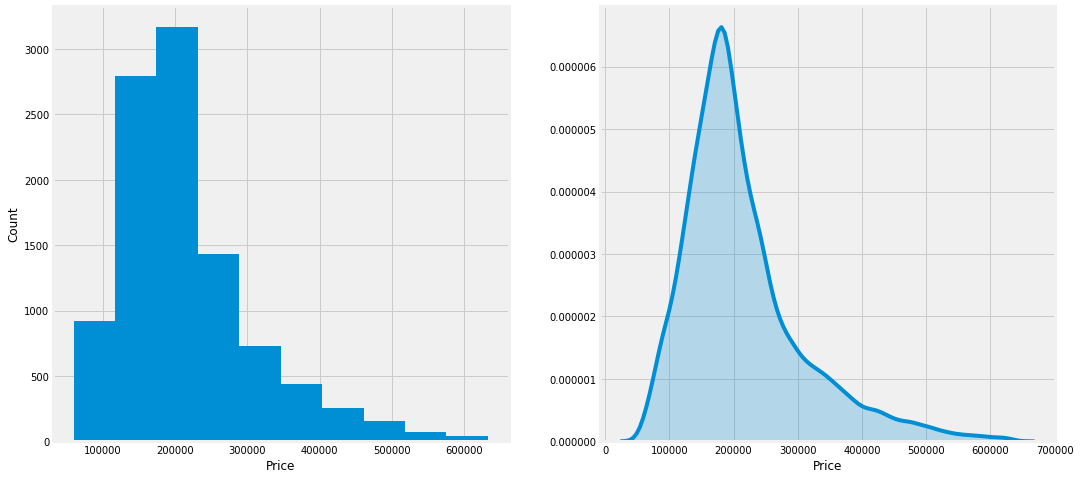

In [10]:
plt.figure(figsize=(16,8))
plt.subplot(121)
data.Price.hist(bins=10)
plt.ylabel("Count")
plt.xlabel("Price")
plt.subplot(122)
sns.kdeplot(data.Price, shade=True, legend=False)
plt.xlabel("Price")
plt.show()

### Распределение целевой переменной в зависимости от количества комнат

D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


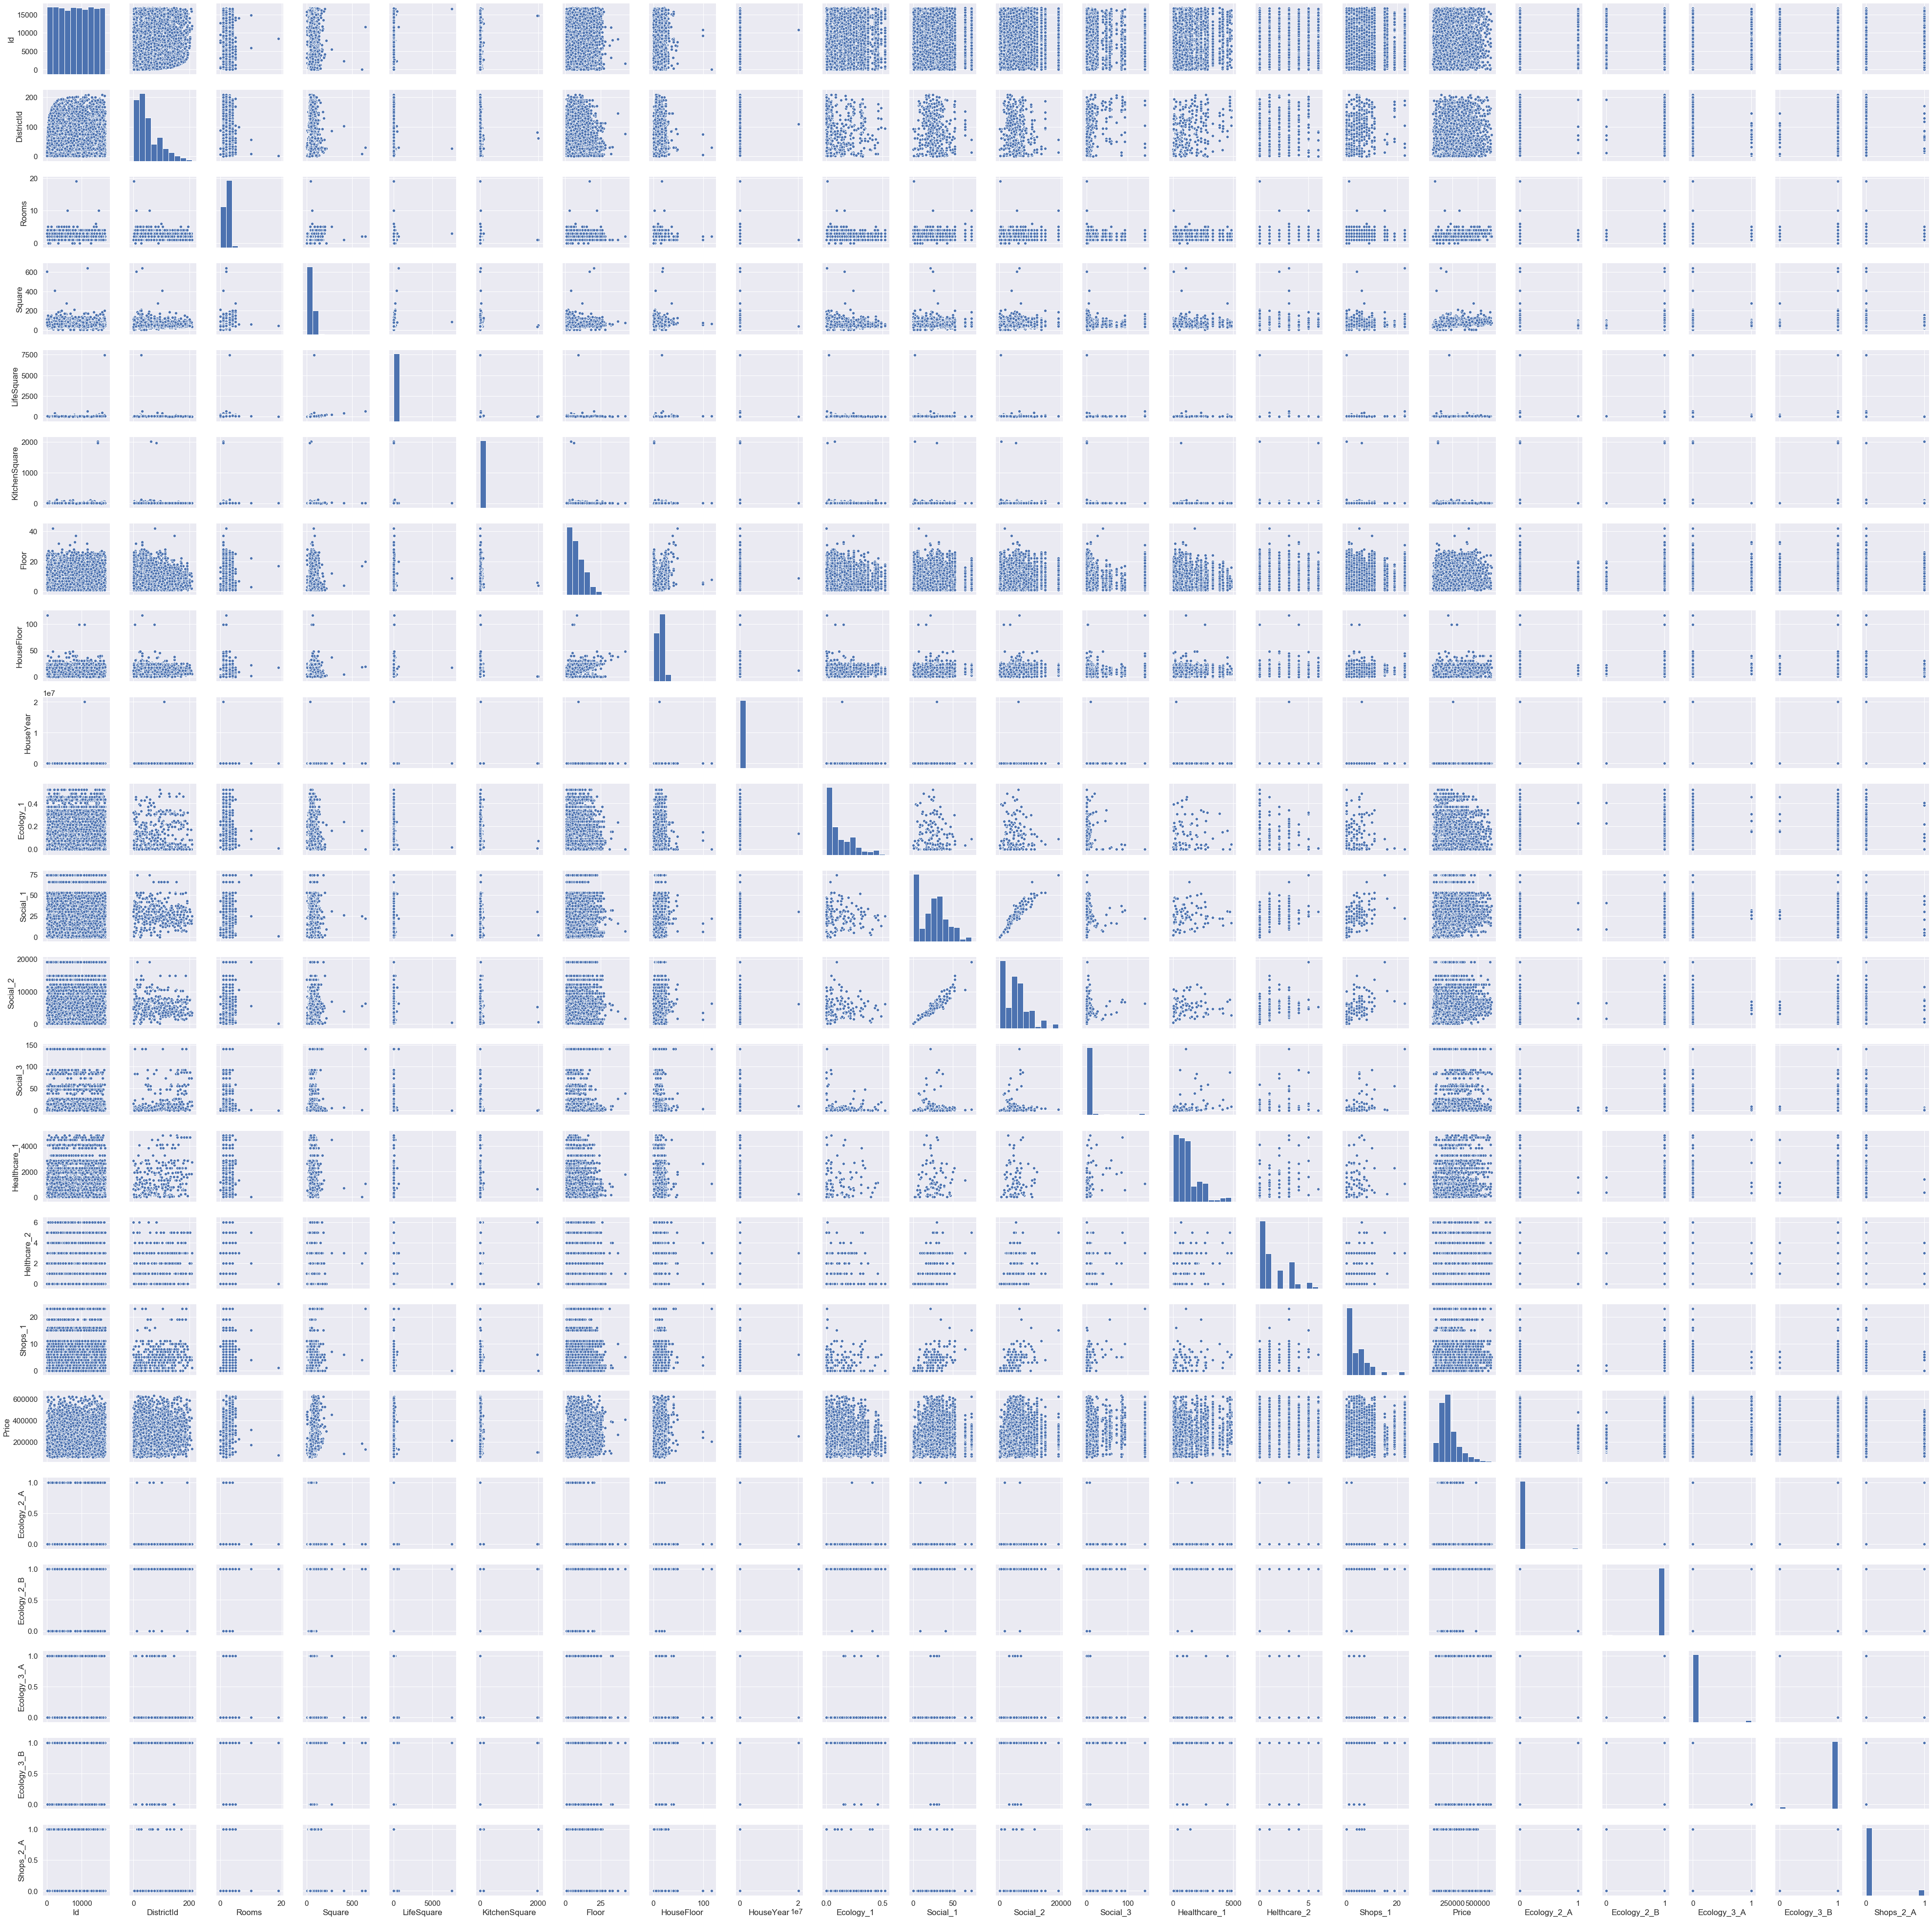

In [30]:
sns.set(font_scale=1.4)
sns.pairplot(X)
plt.show()

In [31]:
plt.fig_size(1,1)
sns.set(font_scale=1.4)
sns.heatmap(X.corr(), annot=True, linewidth=.5, cmap="GnBu")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'fig_size'

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
Ecology_2_A      10000 non-null uint8
Ecology_2_B      10000 non-null uint8
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
dtypes: float64(8), int64(9), uint8(5)
mem

**Линейная регрессия**

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_pred = lr.predict(X_valid)
y_pred